In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("stp_lm.csv")
df.dropna(inplace=True)

In [ ]:
 df.drop_duplicates(inplace=True)
print('after drop duplicates', df.shape)

after drop duplicates (41547, 2)


In [ ]:
df['Tweet'] = df['Tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
df.head(10)
df.shape

<ipython-input-4-e0642c75b29a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet'] = df['Tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


(41547, 2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words='english')
X = vectorizer.fit_transform(df.Tweet)

In [ ]:
y = df["Label"].values

In [ ]:
from sklearn.model_selection import train_test_split

#X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101, stratify=y,shuffle = True)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((35314, 47301), (35314,), (6233, 47301), (6233,))

In [ ]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler()
X_train, y_train = os.fit_resample(X_train, y_train)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((152740, 47301), (152740,), (6233, 47301), (6233,))

In [ ]:
from sklearn.svm import SVC
clf = SVC()
#clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

         0.0       0.26      0.72      0.38      1348
         1.0       0.21      0.17      0.19       655
         2.0       0.38      0.48      0.43       646
         3.0       0.17      0.05      0.08       367
         4.0       0.44      0.25      0.32       315
         5.0       0.07      0.02      0.03       287
         6.0       0.17      0.04      0.06       253
         7.0       0.25      0.09      0.13       234
         8.0       0.22      0.07      0.10       225
         9.0       0.19      0.03      0.06       208
        10.0       0.08      0.02      0.03       191
        11.0       0.60      0.38      0.46       187
        12.0       0.37      0.32      0.35       180
        13.0       0.25      0.03      0.05       170
        14.0       0.07      0.01      0.01       174
        15.0       0.29      0.03      0.05       158
        16.0       0.00      0.00      0.00       164
        17.0       0.63    

In [ ]:
import itertools


def plot_confusion_matrix(cm, classes, normalize=True,title='Doğrulama Tablosu',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Doğrulama Tablosu')
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Doğru Etiketler')
    plt.xlabel('Tahmin Etiketleri')
    plt.tight_layout()

Normalized confusion matrix


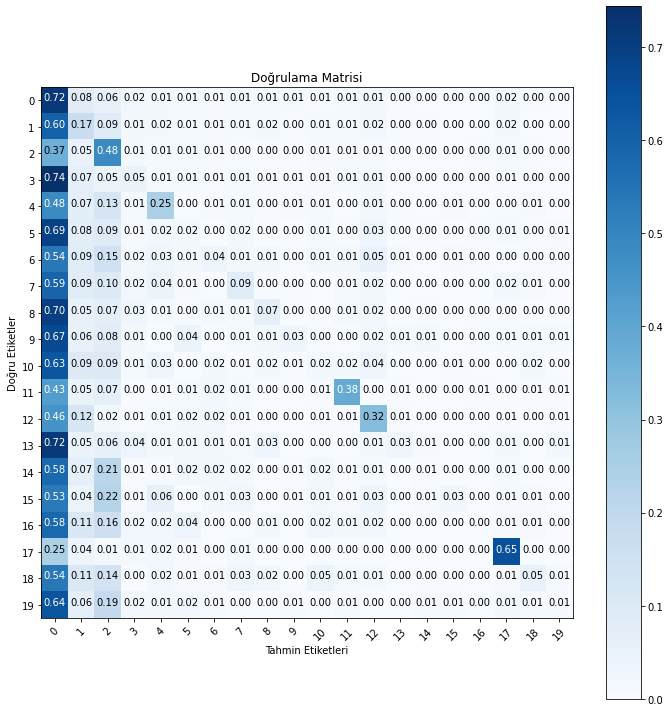

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

plot_confusion_matrix(cm, [i for i in range(20)] ,title='Doğrulama Matrisi', normalize=True)